In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
pd.set_option('display.max_columns', None)

In [8]:
df=pd.read_csv('soccer.csv')
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [149]:
df.shape

(660, 16)

In [152]:
df.isnull().sum()

Country                    0
League                     0
Club                       0
Player Names               0
Matches_Played             0
Substitution               0
Mins                       0
Goals                      0
xG                         0
xG Per Avg Match           0
Shots                      0
OnTarget                   0
Shots Per Avg Match        0
On Target Per Avg Match    0
Year                       0
dtype: int64

In [148]:
df.duplicated().sum()

0

# Q1: What is the total number of goals scored in the entire dataset?




In [10]:
sum_of_goals_per_year = df.groupby('Year')['Goals'].sum()

In [14]:
total_no_of_goals= sum_of_goals_per_year.sum()

In [123]:
print("TOTAL NUMBER OF GOALS :" , total_no_of_goals)

TOTAL NUMBER OF GOALS : 7795


# Q2: Which player has scored the most goals as a substitution

In [18]:
df['Substitution ']


0      16
1       0
2       1
3       3
4      10
       ..
655     0
656     2
657     0
658     0
659    11
Name: Substitution , Length: 660, dtype: int64

In [21]:
subs_goals = df[df['Substitution '] > 0]

In [41]:
player_with_most_substitution_goals = subs_goals.sort_values(by='Goals', ascending=False).iloc[0]


In [42]:
print("Player with the Most Goals as a Substitution:")
print(player_with_most_substitution_goals[['Player Names','Goals']])

Player with the Most Goals as a Substitution:
Player Names    Lionel Messi
Goals                     37
Name: 12, dtype: object


# Q3: Find the top 5 players with the most number of goals scored. Also find the total number of goals scored by them

In [7]:
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [14]:
player_goals = df.groupby('Player Names')['Goals'].sum()


In [18]:
top_players = player_goals.nlargest(5)

In [19]:
total_goals_by_top_players = top_players.sum()


In [20]:
print("Top 5 Players with the Most Goals Scored:")
print(top_players)

print("\nTotal Goals Scored by the Top 5 Players:", total_goals_by_top_players)

Top 5 Players with the Most Goals Scored:
Player Names
Lionel Messi          135
Cristiano Ronaldo     128
Robert Lewandowski    127
Ciro Immobile         107
Luis Suarez            95
Name: Goals, dtype: int64

Total Goals Scored by the Top 5 Players: 592


# Q4: What are the top 10 countries with the most number of players in the dataset?

In [25]:
players_by_country = df['Country'].value_counts()

In [26]:
top_10_countries = players_by_country.head(10)


In [27]:

print("Top 10 Countries with the Most Players:")
print(top_10_countries)

Top 10 Countries with the Most Players:
Spain           100
Italy           100
Germany         100
Brazil          100
England          80
France           60
USA              40
Portugal         40
 Netherlands     40
Name: Country, dtype: int64


# Q5: # Q1. Create a new dataframe after removing the ourliers for Mins Column in the dataset (conside the upper quantile to be 99 percentile and the lower quantile to be 1 percentile.). After that Find the difference in the number of rows?

* Difference is df.shape(only rows) - df.shape(rows of filtered data only)

In [29]:
upper_quantile = df['Mins'].quantile(0.99)
lower_quantile = df['Mins'].quantile(0.01)


In [43]:
updated_data = df[(df['Mins'] >= lower_quantile) & (df['Mins'] <= upper_quantile)]


In [45]:
updated_data

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Netherlands,Eredivisie,(UTR),Gyrano Kerk,24,0,2155,10,7.49,0.33,50,18,2.20,0.79,2020
656,Netherlands,Eredivisie,(AJA),Quincy Promes,18,2,1573,12,9.77,0.59,56,30,3.38,1.81,2020
657,Netherlands,Eredivisie,(PSV),Denzel Dumfries,25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020
658,Netherlands,Eredivisie,None,Cyriel Dessers,26,0,2461,15,14.51,0.56,84,43,3.24,1.66,2020


In [47]:
difference_in_rows = df.shape[0] -updated_data.shape[0]


In [48]:
print("Difference in the number of rows:", difference_in_rows)

Difference in the number of rows: 14


# Q6: Which top 5 players have scored the maximum number of goals throughout all the years? Display them in descending order

In [49]:
player_goals = df.groupby('Player Names')['Goals'].sum()


In [51]:
player_goals = df.groupby('Player Names')['Goals'].sum()


In [52]:
print("Top 5 Players with the Maximum Number of Goals Throughout All Years (in descending order):")
print(top_players)

Top 5 Players with the Maximum Number of Goals Throughout All Years (in descending order):
Player Names
Lionel Messi          135
Cristiano Ronaldo     128
Robert Lewandowski    127
Ciro Immobile         107
Luis Suarez            95
Name: Goals, dtype: int64


# Q7. Using Bar Plot show in which year has Cristiano Ronaldo scored the most number of goals?

In [54]:
ronaldo_data = df[df['Player Names'] == 'Cristiano Ronaldo']

In [55]:
ronaldo_goals_by_year = ronaldo_data.groupby('Year')['Goals'].sum()

In [56]:
year_with_most_goals = ronaldo_goals_by_year.idxmax()

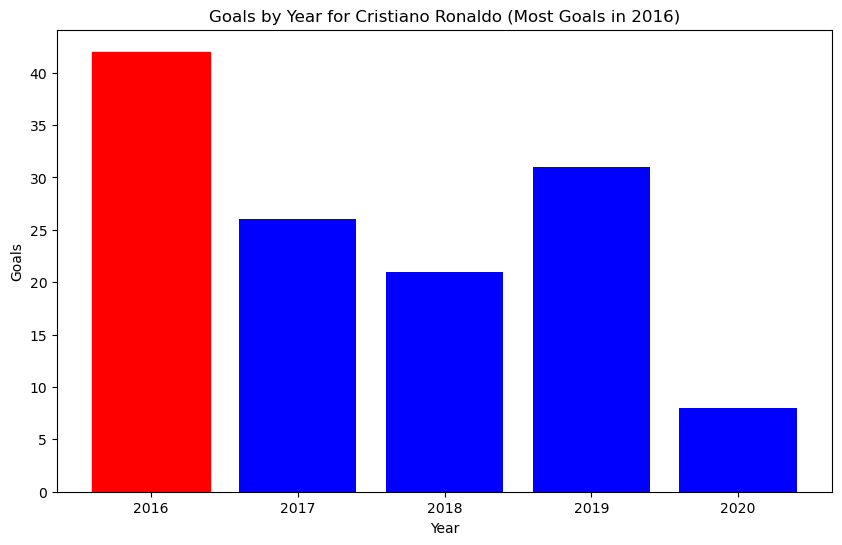

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(ronaldo_goals_by_year.index, ronaldo_goals_by_year.values)
bars = plt.bar(ronaldo_goals_by_year.index, ronaldo_goals_by_year.values, color='blue')
bars[ronaldo_goals_by_year.index.get_loc(year_with_most_goals)].set_color('red')
plt.xlabel('Year')
plt.ylabel('Goals')
plt.title(f'Goals by Year for Cristiano Ronaldo (Most Goals in {year_with_most_goals})')
plt.show()

red bar is used for year with highest goals

# Q8. In the year 2019 who has more Goals between Ronaldo and Messi? 
- First print them normally 
- Display the comparison using a bar plot

In [61]:
goals_2019 = df[df['Year'] == 2019]

In [62]:
ronaldo_goals = goals_2019[goals_2019['Player Names'] == 'Cristiano Ronaldo']
messi_goals = goals_2019[goals_2019['Player Names'] == 'Lionel Messi']

In [64]:
print("Goals in 2019:")
print("Cristiano Ronaldo:", ronaldo_goals['Goals'].values[0])
print("Lionel Messi:", messi_goals['Goals'].values[0])


Goals in 2019:
Cristiano Ronaldo: 31
Lionel Messi: 25


In [66]:
players = ['Cristiano Ronaldo', 'Lionel Messi']
goals = [ronaldo_goals['Goals'].values[0], messi_goals['Goals'].values[0]]


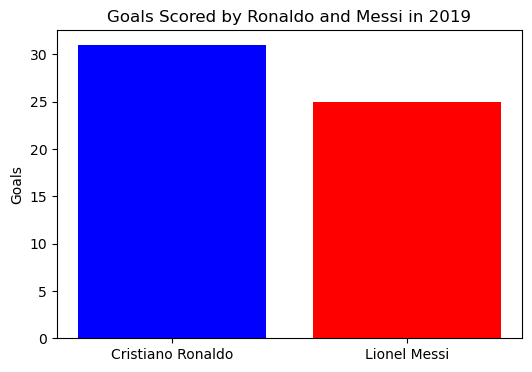

In [68]:
plt.figure(figsize=(6,4))
plt.bar(players, goals, color=['blue', 'red'])
plt.ylabel('Goals')
plt.title('Goals Scored by Ronaldo and Messi in 2019')
plt.show()

# Q9: Using Pie Chart show the amount of data various Countries are containing in this dataset(use the Country Columns Display the percentage of data as well in the pie chart

In [70]:
country_data = df['Country'].value_counts()
percentage_data = (country_data / country_data.sum()) * 100

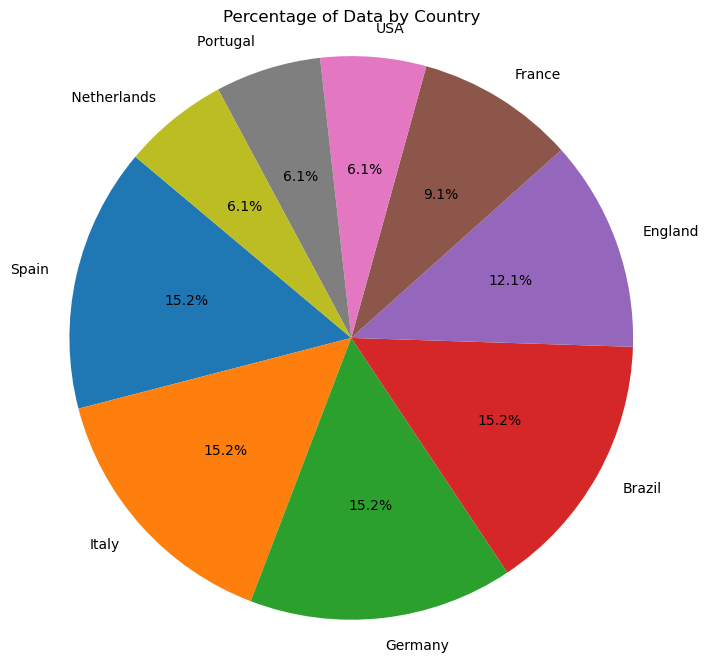

In [73]:
plt.figure(figsize=(8, 8))
plt.pie(percentage_data, labels=percentage_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Data by Country')
plt.axis('equal')  
plt.show()


# Q10: Display a Heatmap  to show the correlation between the columns in the dataset. The heatmap should have the value of the correlation printed within the boxes.

In [75]:
correlation_matrix = df.corr()

C:\Users\RAJ\AppData\Local\Temp\ipykernel_23208\4214245630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


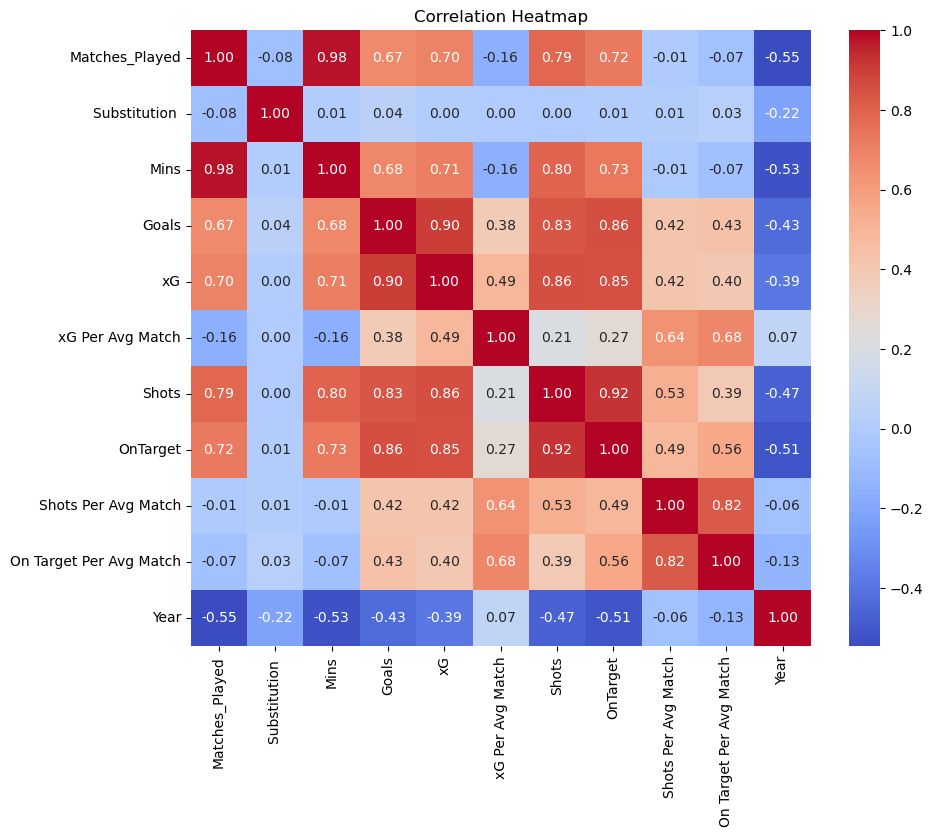

In [76]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Q11: Which Country has the maximum median OnTarget Shots among all the Countries in the year 2020?

In [77]:
data_2020 = df[df['Year'] == 2020]

In [78]:
median_ontarget_shots_by_country = data_2020.groupby('Country')['OnTarget'].median()


In [79]:
max_median_ontarget_shots = median_ontarget_shots_by_country.idxmax()


In [80]:
print("Country with Maximum Median OnTarget Shots in 2020:",max_median_ontarget_shots)


Country with Maximum Median OnTarget Shots in 2020:  Netherlands


# Q12. Who has the best average  Goals per minute?
* Consider only those players who have played more than 30 games
* Then Find Goals per minute
* Find Mean of Goals per minute and sort the values

In [82]:
filtered_data = df[df['Matches_Played'] > 30]

In [83]:
filtered_data['Goals_Per_Minute'] = filtered_data['Goals'] / filtered_data['Mins']


C:\Users\RAJ\AppData\Local\Temp\ipykernel_23208\3714045507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Goals_Per_Minute'] = filtered_data['Goals'] / filtered_data['Mins']


In [84]:
mean_goals_per_minute = filtered_data['Goals_Per_Minute'].mean()


In [85]:
sorted_data = filtered_data.sort_values(by='Goals_Per_Minute', ascending=False)


In [86]:
best_player = sorted_data.iloc[0]['Player Names']


In [89]:

print("Player with the Best Average Goals Per Minute (for players with more than 30 games):", best_player)


print("Mean of Goals Per Minute:", mean_goals_per_minute)

Player with the Best Average Goals Per Minute (for players with more than 30 games): Lionel Messi
Mean of Goals Per Minute: 0.005430139411626984


# Q 13. Which Player has the least and most number of missed shots in the dataset?
* Missed Shots=Shots-On Target

In [90]:
df['Missed_Shots'] = df['Shots'] - df['OnTarget']


In [93]:
player_with_least_missed_shots = df.loc[df['Missed_Shots'].min()]['Player Names']
player_with_most_missed_shots = df.loc[df['Missed_Shots'].max()]['Player Names']

In [94]:
print("Player with the Least Missed Shots:", player_with_least_missed_shots)
print("Player with the Most Missed Shots:", player_with_most_missed_shots)

Player with the Least Missed Shots: Antoine Griezmann
Player with the Most Missed Shots: Andrea Belotti


# Q14: How many countries have had players who played more than 35 matches? Create a bar plot to display the count for each country.

In [95]:
data = df[df['Matches_Played'] > 35]

In [96]:
country_counts = data['Country'].value_counts()

In [97]:
num_countries = len(country_counts)

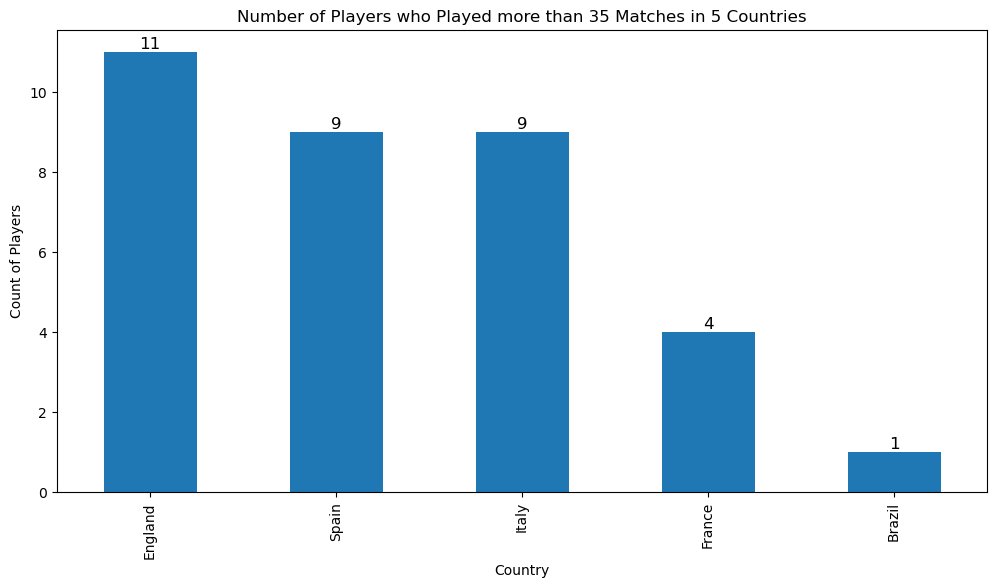

In [99]:
plt.figure(figsize=(12, 6))
ax = country_counts.plot(kind='bar')
ax.bar_label(ax.containers[0], fmt='%d', fontsize=12, color='black')
plt.xlabel('Country')
plt.ylabel('Count of Players')
plt.title(f'Number of Players who Played more than 35 Matches in {num_countries} Countries')
plt.show()

# Q15: Draw a Line Chart to show the comparison of the top 5 highest scoring players in the dataset throughout the years(2016-2020)

In [110]:
data_years = df[(df['Year'] >= 2016) & (df['Year'] <= 2020)]

In [111]:
player_goals = data_years.groupby(['Player Names', 'Year'])['Goals'].sum()


In [112]:
top_players = player_goals.groupby('Player Names').sum().nlargest(5)


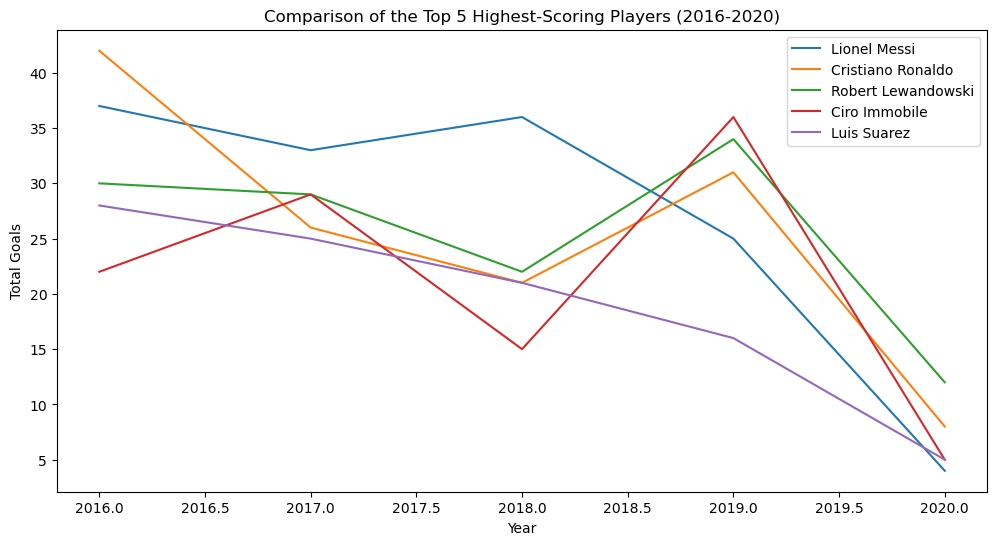

In [121]:
plt.figure(figsize=(12, 6))

for player in top_players.index:
    player_data = player_goals[player]
    years = player_data.index.get_level_values('Year')
    goals = player_data.values
    plt.plot(years, goals, label=player)
plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.title('Comparison of the Top 5 Highest-Scoring Players (2016-2020)')
plt.legend()
plt.show()